<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5390 | Computational Analytics with Python</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: Team 2

In [2]:
# package imports
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling

# data import
file = './hw_feature_engineering.xlsx'

# defining variable for file
housing_df = pd.read_excel(io     = file,
                      header = 0   )

# viewing file
housing_df.head(n=5)


,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Sale_Price,log_Sale_Price
0,1,31770,112,1080,1656,0,1656,528,272,6,5,1,0,1,7,2,2,215000,12.278398
1,2,11622,0,882,896,0,896,730,260,5,6,1,0,1,5,0,1,105000,11.561725
2,3,14267,108,1329,1329,0,1329,312,429,6,6,1,1,1,6,0,1,172000,12.055256
3,4,11160,0,2110,2110,0,2110,522,0,7,5,2,1,1,8,2,2,244000,12.404928
4,5,13830,0,928,928,701,1629,482,246,5,5,2,1,1,6,1,2,189900,12.154258


In [3]:
# checking data types and missing values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_id     2930 non-null   int64  
 1   Lot_Area        2930 non-null   int64  
 2   Mas_Vnr_Area    2930 non-null   int64  
 3   Total_Bsmt_SF   2930 non-null   int64  
 4   First_Flr_SF    2930 non-null   int64  
 5   Second_Flr_SF   2930 non-null   int64  
 6   Gr_Liv_Area     2930 non-null   int64  
 7   Garage_Area     2930 non-null   int64  
 8   Porch_Area      2930 non-null   int64  
 9   Overall_Qual    2930 non-null   int64  
 10  Overall_Cond    2930 non-null   int64  
 11  Full_Bath       2930 non-null   int64  
 12  Half_Bath       2930 non-null   int64  
 13  Kitchen_AbvGr   2930 non-null   int64  
 14  TotRms_AbvGr    2930 non-null   int64  
 15  Fireplaces      2930 non-null   int64  
 16  Garage_Cars     2930 non-null   int64  
 17  Sale_Price      2930 non-null   i

In [4]:
# exploring the data with describe() function
housing_df.describe().round(decimals = 3)

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Sale_Price,log_Sale_Price
count,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000
mean,1465.500,10121.239,101.097,1051.256,1159.558,335.505,1499.602,472.658,182.891,6.095,5.563,1.567,0.380,1.044,6.443,0.599,1.766,180796.060,12.021
std,845.962,7870.710,178.635,440.968,391.891,428.446,505.585,215.187,159.834,1.411,1.112,0.553,0.503,0.214,1.573,0.648,0.761,79886.692,0.408
min,1.000,1300.000,0.000,0.000,334.000,0.000,334.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,2.000,0.000,0.000,12789.000,9.456
25%,733.250,7436.500,0.000,793.000,876.250,0.000,1126.000,320.000,48.000,5.000,5.000,1.000,0.000,1.000,5.000,0.000,1.000,129500.000,11.771
50%,1465.500,9399.500,0.000,990.000,1084.000,0.000,1442.000,480.000,165.000,6.000,5.000,2.000,0.000,1.000,6.000,1.000,2.000,160000.000,11.983
75%,2197.750,11477.250,162.750,1301.500,1384.000,703.750,1742.750,576.000,266.000,7.000,6.000,2.000,1.000,1.000,7.000,1.000,2.000,213500.000,12.271
max,2930.000,215245.000,1600.000,6110.000,5095.000,2065.000,5642.000,1488.000,1424.000,10.000,9.000,4.000,2.000,3.000,15.000,4.000,5.000,755000.000,13.534


<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
<strong>a)</strong> Write a hypothesis on the effect you believe each new feature will have on the response variable (strong positive correlation, etc.). You may choose to hypothesize on either <em>Sale_Price</em> or <em>log_Sale_Price</em> (you will test your engineered features on both). (minimum 3 sentences per feature)
<br><br>
<strong>b)</strong> Give a practical, real world explanation as to why you feel each new feature adds value. (minimum of 2 sentences per feature)

**a) Hypothesis**

__Feature 1: Yard Size__

The assumption is that the yard size has a strong positive correlation with both Sale Price and Log price. Typically, a larger yard it is a feature that potential house buyers are in the lookout for, more specifically in the suburban areas where the outdoor space is highly valued for recreational activities and to spend time with family and friends. As yard size increases, the property price is expected to increase accordingly, especially in places where buyers prioritize outdoor living spaces when they research in the housing market.



**Feature 2: Luxury Score**

It is assumed that the Luxury Score has a strong positive correlation with the sales price. In general, properties with higher quality, better condition, and better features tend to have higher value. Based on this idea, the Luxury Score is defined to include the overall quality and condition of the property, as well as optional features such as fireplaces and garages. In particular, fireplaces are in high demand in cold climates because they increase comfort and add to the appeal of a property. Furthermore, because car ownership is high in the United States, the presence and size of a garage can have a significant impact on the value of a property. The more of these amenities a property has, and the higher the overall quality and condition, the higher the Luxury Score. Therefore, properties with a high Luxury Score are expected to attract more potential buyers and increase the sales price.

__Feature 3: Living Comfort__ <br>
The hypothesis is that the sale price of a house (Sale_Price) increases with the number of amenities that make it comfortable to live in. Specifically, fireplaces, garage_cars, good_bath_ratio, and has_porch. Basically, the higher these are, the better the quality of life. Consequently, they are positively correlated with Sale_Price. A value called living_comfort is calculated from these values ​​and performed an analysis assuming that this variable has a positive correlation with Sale_Price.

__b) Add Values__ <br>
__Feature 1: Yard_Size__ <br>
The backyard size can be important for specific types of buyers, e.g. buyers that like to have people over for BBQ or buyers that have a dog. Maybe a buyer wants to build a swimming pool and requires a certain backyard space to do so.For this feature, the backyard size is expressed as a total number and not a proportion of the lot because e.g. 30% of a small lot is still small whereas 15% of a big lot can be sufficient backyard space for a buyer if the total size is big enough.<br>
__Source__: Welter, L. (2021, March 22). Does lot size matter? JTB Homes. https://jtbhomes.com/blog/does-lot-size-matter/#:~:text=Lot%20Size%20As%20a%20Factor,land%20is%20to%20home%20buyers. <br>
Gomez, J. (2022, June 4). 8 critical factors that influence a home’s value | Opendoor. Opendoor. https://www.opendoor.com/articles/factors-that-influence-home-value.<br>
<br>
__Feature 2: Luxury_Score__ <br>
The luxury score is an index that describes the overall quality and condition combined with amenities that are considered luxurious - in this case fireplace and garage. Buyers will be willing to pay more if the house is in good shape and has luxurious features like a fireplace and a garage. More fireplaces and a garage for more cars are considered more luxurious, as it gets really cold in Iowa during the winter and the city uses salt to free the roads from ice which is not optimal for cars. Additionally, public transportation is not sufficient in Ames and Iowa and most people own cars, which makes a multiple-car-garage more attractive. This is why a binary feature ('has_xyz') is not exhaustive enough here.<br>
__Source__: Sirmans, G. S., Macpherson, D. A., & Florida State University. (2003). The value of housing characteristics. In National Association of Realtors, NAR Research. https://www.nar.realtor/sites/default/files/documents/2003-value-housing-characteristics-2003-12-brief.pdf. <br>
<br>
__Feature 3: Living_Comfort__ <br>
Living comfort expresses a score of how the amenities of the house make living there more comfortable. Some people like to sit on their porch on a Sunday morning in the summer to read the newspaper. They want to have it nice and warm in the winter with a fireplace and do not want to miss the convenience of parking their car in a garage. Additionally, having a good ratio of bath and rooms is comfortable. Guests do not have to use the main bathroom, and if more than 2 people live in that household, it is convenient that two people can use a bathroom for whichever reason at the same time. The distinction to Luxury_Score is that is does not reflect the condition or the quality of the home - it solely reflects the amentities that make living more comfortable.<br>
__Source__: Kalfrin, V., & Kalfrin, V. (2024, November 26). What upgrades increase home value? 25 High-ROI improvements buyers love. HomeLight Blog. https://www.homelight.com/blog/what-upgrades-increase-home-value/. <br>
Sirmans, G. S., Macpherson, D. A., & Florida State University. (2003b). The value of housing characteristics. In National Association of Realtors, NAR Research. https://www.nar.realtor/sites/default/files/documents/2003-value-housing-characteristics-2003-12-brief.pdf

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cells below to develop your new features.

In [5]:
# defining total_baths feature
housing_df['total_baths'] = housing_df['Full_Bath'] + 0.5 * housing_df['Half_Bath']

In [6]:
# calculating logarithms of features for testing correlations

housing_df['log_Lot_Area'] = np.log1p(housing_df['Lot_Area'])
housing_df['log_First_Flr_SF'] = np.log1p(housing_df['First_Flr_SF'])
housing_df['log_Porch_Area'] = np.log1p(housing_df['Porch_Area'])
housing_df['log_Garage_Area'] = np.log1p(housing_df['Garage_Area'])


In [7]:
# defining binary features
housing_df['has_garage']       = 0
housing_df['has_fireplace']    = 0
housing_df['good_bath_ratio']  = 0
housing_df['has_porch']        = 0

# looping over each row to calculate binary value
for index, value in housing_df.iterrows():

    # has_garage
    if housing_df.loc[index, 'Garage_Area'] > 0:
        housing_df.loc[index, 'has_garage'] = 1

    # has_fireplace
    if housing_df.loc[index, 'Fireplaces'] >= 1:
        housing_df.loc[index, 'has_fireplace'] = 1

    # good_bath_ratio
    if housing_df.loc[index, 'total_baths'] / housing_df.loc[index, 'TotRms_AbvGr']  < 0.6:
        housing_df.loc[index, 'good_bath_ratio'] = 1
    # good_bath_ratio
    if housing_df.loc[index, 'total_baths'] / housing_df.loc[index, 'TotRms_AbvGr']  <= 0.3:
        housing_df.loc[index, 'good_bath_ratio'] = 0

    # has_porch
    if housing_df.loc[index, 'Porch_Area'] > 0:
        housing_df.loc[index, 'has_porch'] = 1


## Feature 1 Engineering

In [8]:
## Feature 1 ##
# Backyard_Size = Lot_Area - First_Flr_SF - Porch_Area - Garage_Area

# creating new column for new feature 'Backyard_Size'
housing_df['Yard_Size'] = (housing_df['Lot_Area'] -
                           housing_df['log_First_Flr_SF'] -
                           housing_df['log_Porch_Area'] -
                           housing_df['log_Garage_Area']).round(decimals=-2) # rounding to 100 sqft to make it easier to work with

# calculating correlation with Sale_Price and log_Sale_Price
yard_corr1 = housing_df.loc[:, 'Yard_Size'].corr(housing_df.loc[:, 'Sale_Price']).round(decimals=3)
yard_corr2 = housing_df.loc[:, 'Yard_Size'].corr(housing_df.loc[:, 'log_Sale_Price']).round(decimals=3)

# printing correlations
print("Sale_Price:",yard_corr1,"\nlog_Sale_Price:",yard_corr2)


Sale_Price: 0.269 
log_Sale_Price: 0.257


In [9]:
## Yard Size - Sale Price OLR to check R-Squared

# INSTANTIATING a model type
lm_price_yard = smf.ols(formula = """Sale_Price ~
                                  Lot_Area +
                                  log_First_Flr_SF +
                                  log_Porch_Area +
                                  log_Garage_Area""",
                        data = housing_df)

# telling Python to FIT the data to the blueprint
results_yard = lm_price_yard.fit()

# printing a summary of the results
print(results_yard.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     616.4
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:59:24   Log-Likelihood:                -36336.
No. Observations:                2930   AIC:                         7.268e+04
Df Residuals:                    2925   BIC:                         7.271e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7.728e+05   2.47e+04  

In [10]:
## Yard Size - log_Sale Price OLR to check R-Squared

# INSTANTIATING a model type
lm_price_yard_log = smf.ols(formula = """log_Sale_Price ~
                                  Lot_Area +
                                  log_First_Flr_SF +
                                  log_Porch_Area +
                                  log_Garage_Area""",
                        data = housing_df)

# telling Python to FIT the data to the blueprint
results_yard_log = lm_price_yard_log.fit()

# printing a summary of the results
print(results_yard_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sale_Price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     755.7
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:59:24   Log-Likelihood:                -487.58
No. Observations:                2930   AIC:                             985.2
Df Residuals:                    2925   BIC:                             1015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.1082      0.120  

<br>

## Feature 2 Engineering

In [11]:
## Feature 2 ##
# Luxury_Score = 2 × Overall_Qual + 2 x Overall_Cond + 0.5 x Fireplaces +  0.5 x Garage_Cars

# creating new column for new feature 'Luxury_Score'
housing_df['Luxury_Score'] = (2 * housing_df["Overall_Qual"] +
                              2 * housing_df["Overall_Cond"] +
                              0.5 * housing_df["Fireplaces"] +
                              0.5 * housing_df["Garage_Cars"]).round(decimals=1)

# calculating correlation with Sale_Price and log_Sale_Price
luxury_corr1 = housing_df.loc[:, 'Luxury_Score'].corr(housing_df.loc[:, 'Sale_Price']).round(decimals=3)
luxury_corr2 = housing_df.loc[:, 'Luxury_Score'].corr(housing_df.loc[:, 'log_Sale_Price']).round(decimals=3)

# printing correlations
print("Sale_Price:",luxury_corr1,"\nlog_Sale_Price:",luxury_corr2)

Sale_Price: 0.656 
log_Sale_Price: 0.713


In [12]:
## Luxury Score - Sale Price OLR to check R-Squared

# INSTANTIATING a model type
lm_price_luxury = smf.ols(formula = """Sale_Price ~
                                    Overall_Qual +
                                    Overall_Cond +
                                    Fireplaces +
                                    Garage_Cars""",
                        data = housing_df)

# telling Python to FIT the data to the blueprint
results_luxury = lm_price_luxury.fit()

# printing a summary of the results
print(results_luxury.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1755.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:59:24   Log-Likelihood:                -35439.
No. Observations:                2930   AIC:                         7.089e+04
Df Residuals:                    2925   BIC:                         7.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.106e+04   5687.207    -14.252   

In [13]:
## Luxury Score - log_Sale Price OLR to check R-Squared

# INSTANTIATING a model type
lm_price_luxury_log = smf.ols(formula = """log_Sale_Price ~
                                    Overall_Qual +
                                    Overall_Cond +
                                    Fireplaces +
                                    Garage_Cars""",
                        data = housing_df)

# telling Python to FIT the data to the blueprint
results_luxury_log = lm_price_luxury_log.fit()

# printing a summary of the results
print(results_luxury_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sale_Price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     2312.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:59:24   Log-Likelihood:                 561.57
No. Observations:                2930   AIC:                            -1113.
Df Residuals:                    2925   BIC:                            -1083.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.5095      0.026    400.710   

<br>

## Feature 3 Engineering

In [14]:
## Feature 3 ##
# living_comfort = Fireplaces + Garage_Cars + good_bath_ratio + has_porch

# creating new column for new feature 'living_comfort'
housing_df['living_comfort'] = (housing_df['Fireplaces'] +
                                housing_df['Garage_Cars'] +
                                housing_df['good_bath_ratio'] +
                                housing_df['has_porch'])

# calculating correlation with Sale_Price and log_Sale_Price
comfort_corr1 = housing_df.loc[:, 'living_comfort'].corr(housing_df.loc[:, 'Sale_Price']).round(decimals=3)
comfort_corr2 = housing_df.loc[:, 'living_comfort'].corr(housing_df.loc[:, 'log_Sale_Price']).round(decimals=3)

# printing correlations
print("Sale_Price:",comfort_corr1,"\nlog_Sale_Price:",comfort_corr2)

Sale_Price: 0.685 
log_Sale_Price: 0.73


In [15]:
## Comfort Living - Sale Price OLR

# INSTANTIATING a model type
lm_price_comfort = smf.ols(formula = """Sale_Price ~
                                        Fireplaces +
                                        Garage_Cars +
                                        good_bath_ratio +
                                        has_porch""",
                        data = housing_df)

# telling Python to FIT the data to the blueprint
results_comfort = lm_price_comfort.fit()

# printing a summary of the results
print(results_comfort.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     766.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:59:25   Log-Likelihood:                -36181.
No. Observations:                2930   AIC:                         7.237e+04
Df Residuals:                    2925   BIC:                         7.240e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.439e+04   3218.907     

In [16]:
## Comfort Living - log_Sale Price OLR

# INSTANTIATING a model type
lm_price_comfort_log = smf.ols(formula = """log_Sale_Price ~
                                        Fireplaces +
                                        Garage_Cars +
                                        good_bath_ratio +
                                        has_porch""",
                        data = housing_df)

# telling Python to FIT the data to the blueprint
results_comfort_log = lm_price_comfort_log.fit()

# printing a summary of the results
print(results_comfort_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Sale_Price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     950.0
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:59:25   Log-Likelihood:                -307.63
No. Observations:                2930   AIC:                             625.3
Df Residuals:                    2925   BIC:                             655.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.2792      0.016    7

## Step 3: Check the Results

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop scatterplots and a correlation matrix or a heatmap to show the linear relationships between your three new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

<br>

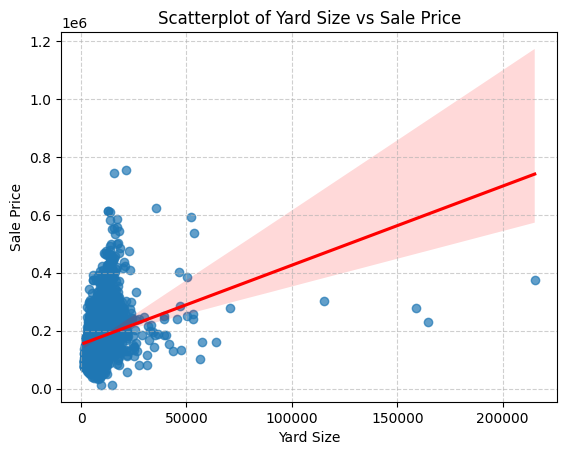

In [17]:
## Scatterplot - Feature 1 ##

# Scatterplot for yard size and sale price
sns.regplot(x='Yard_Size',
            y='Sale_Price',
            data=housing_df,
            scatter_kws={"alpha": 0.7},
            line_kws={"color": "red"})

# Set the title and axis labels
plt.title('Scatterplot of Yard Size vs Sale Price')
plt.xlabel('Yard Size')
plt.ylabel('Sale Price')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

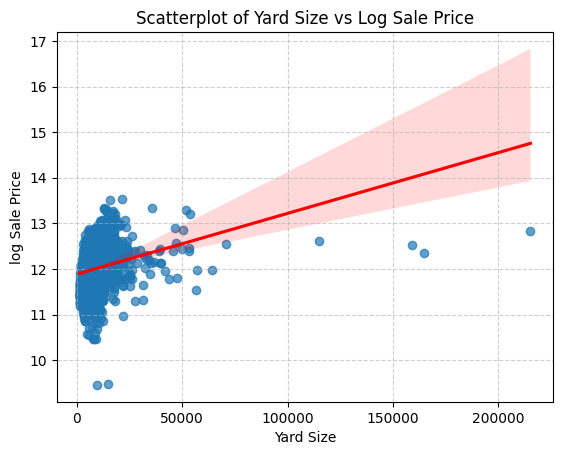

In [18]:
# Scatter plot for yard size and log_sale pricee
# Scatter plot
sns.regplot(x='Yard_Size',
            y='log_Sale_Price',
            data=housing_df,
            scatter_kws={"alpha": 0.7},
            line_kws={"color": "red"})

# Set the title and axis labels
plt.title('Scatterplot of Yard Size vs Log Sale Price')
plt.xlabel('Yard Size')
plt.ylabel('log Sale Price')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

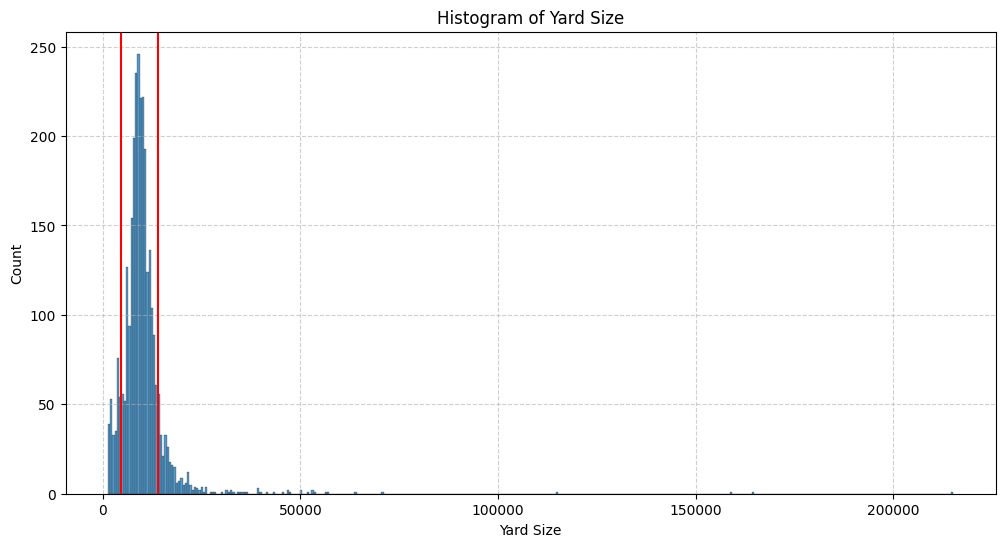

In [19]:
# Histogram for yard size

# Plot size config
plt.figure(figsize=(12,6)) # making plot wider to make it easier to see dimensions

# Scatter plot
sns.histplot(x = 'Yard_Size',
            data = housing_df)


# Titles and axis labels
plt.title(label   = 'Histogram of Yard Size')
plt.xlabel(xlabel = 'Yard Size')
plt.ylabel(ylabel = 'Count')

# Adding x-lines to stress the insights
plt.axvline(4500, color='red')
plt.axvline(14000, color='red')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Showing the plot
plt.show()

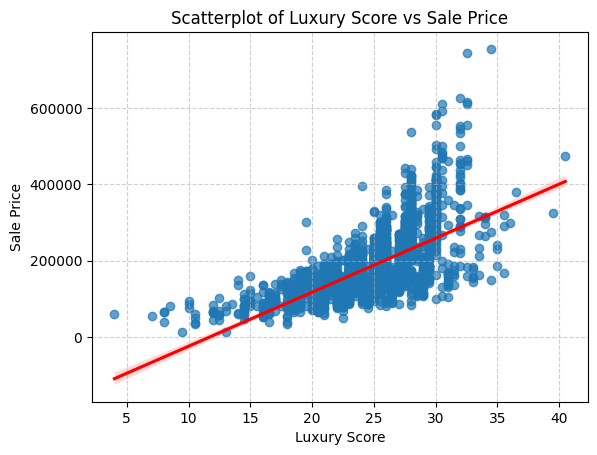

In [20]:
## Scatterplot - Feature 2 ##
# Luxury_Score -- Mizuki

# Scatterplot - Luxury_Score and Sale_Price
sns.regplot(x='Luxury_Score',
            y='Sale_Price',
            data=housing_df,
            scatter_kws={'alpha': 0.7},  # Transparency for scatter points
            line_kws={'color': 'red'})

# Titles and axis labels
plt.title(label   = 'Scatterplot of Luxury Score vs Sale Price')
plt.xlabel(xlabel = 'Luxury Score')
plt.ylabel(ylabel = 'Sale Price')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Displaying the plot
plt.show()

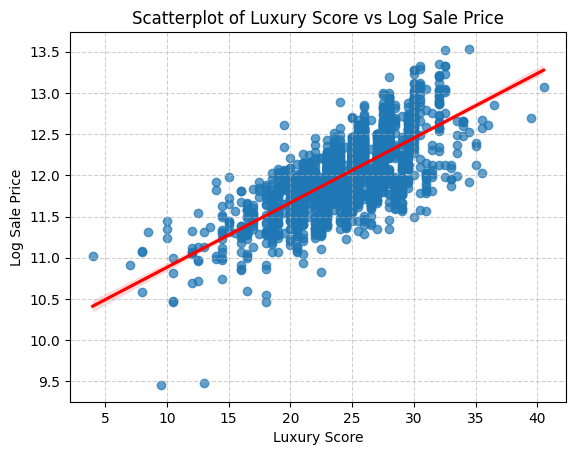

In [21]:
# Scatterplot - Luxury Score and log_Sale_Price
sns.regplot(x='Luxury_Score',
            y='log_Sale_Price',
            data=housing_df,
            scatter_kws={'alpha': 0.7},
            line_kws={'color': 'red'})

# Titles and axis labels
plt.title(label   = 'Scatterplot of Luxury Score vs Log Sale Price')
plt.xlabel(xlabel = 'Luxury Score')
plt.ylabel(ylabel = 'Log Sale Price')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Displaying the plot
plt.show()

Text(0, 0.5, 'Count')

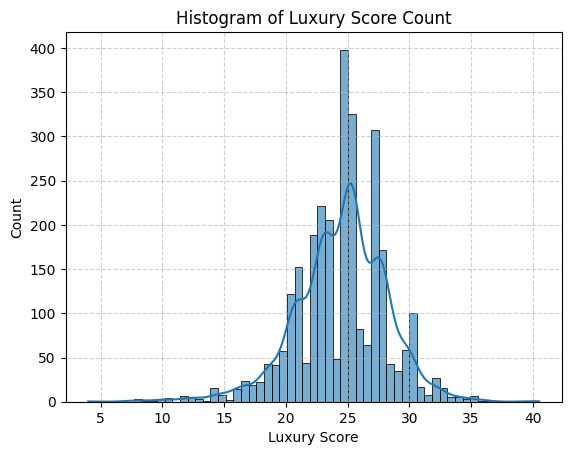

In [22]:
# Histogram for Luxury Score
sns.histplot(x   = 'Luxury_Score',
            data = housing_df,
            kde=True, alpha=0.6)

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Titles and axis labels
plt.title(label   = 'Histogram of Luxury Score Count')
plt.xlabel(xlabel = 'Luxury Score')
plt.ylabel(ylabel = 'Count')

<br>

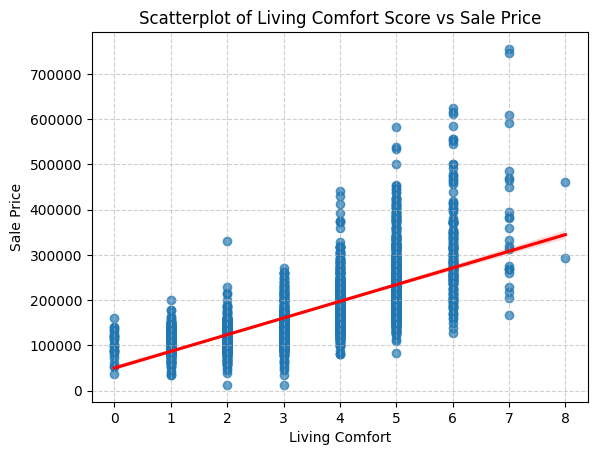

In [23]:
## Scatterplot - Feature 3 ##

# scatter plot for living comfort
sns.regplot(x='living_comfort',
            y='Sale_Price',
            data=housing_df,
            scatter_kws={"alpha": 0.7},
            line_kws={"color": "red"})

# Set the title and axis labels
plt.title('Scatterplot of Living Comfort Score vs Sale Price')
plt.xlabel('Living Comfort')
plt.ylabel('Sale Price')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

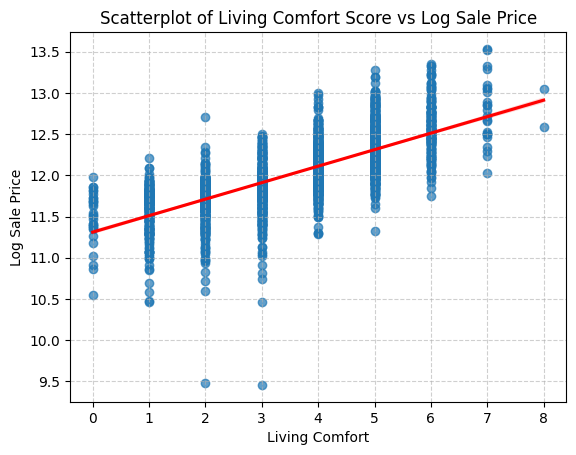

In [24]:
# Scatter plot for living comfort
sns.regplot(x='living_comfort',
            y='log_Sale_Price',
            data=housing_df,
            scatter_kws={"alpha": 0.7},
            line_kws={"color": "red"})

# Set the title and axis labels
plt.title('Scatterplot of Living Comfort Score vs Log Sale Price')
plt.xlabel('Living Comfort')
plt.ylabel('Log Sale Price')

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

Text(0, 0.5, 'Count')

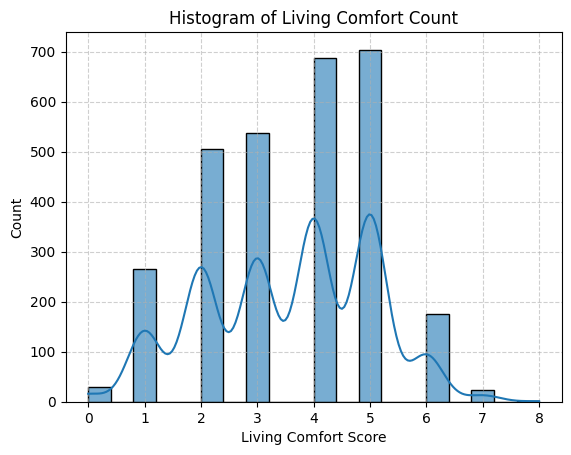

In [25]:
# histogram for living_comfort
sns.histplot(x    = 'living_comfort',
            data = housing_df,
            kde=True, alpha=0.6)

# Add Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Titles and axis labels
plt.title(label   = 'Histogram of Living Comfort Count')
plt.xlabel(xlabel = 'Living Comfort Score')
plt.ylabel(ylabel = 'Count')

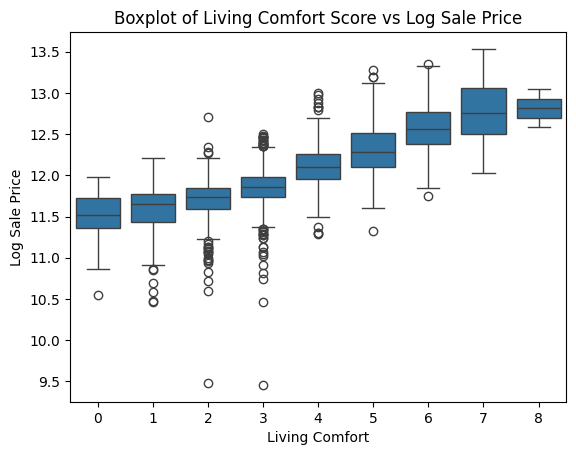

In [26]:
# Boxplot for living comfort and log_Sale_Price
sns.boxplot(x    = 'living_comfort',
            y    = 'log_Sale_Price',
            data = housing_df)

# Titles and axis labels
plt.title(label   = 'Boxplot of Living Comfort Score vs Log Sale Price')
plt.xlabel(xlabel = 'Living Comfort')
plt.ylabel(ylabel = 'Log Sale Price')

# Displaying the plot
plt.show()

<br>

In [27]:
## Correlations ##
# correlations - All selected features and prices
log_corr = housing_df.loc[ : , ['Yard_Size',
                                'Luxury_Score',
                                'living_comfort',
                                'Sale_Price',
                                'log_Sale_Price'] ].corr(method = 'pearson').round(decimals = 2)

# checking results
log_corr.loc[ ['Yard_Size',
               'Luxury_Score',
               'living_comfort'],
              ['Sale_Price', 'log_Sale_Price'] ]

#printing correlations for selected features
print(f"""
FEATURES
=========
-----------
{housing_df['Yard_Size'].value_counts(normalize = False).head(n=10)}

{housing_df['Luxury_Score'].value_counts(normalize = False).sort_index()}

{housing_df['living_comfort'].value_counts(normalize = False).sort_index()}

---------------------
Correlations
---------------------
{log_corr}
""")



FEATURES
-----------
Yard_Size
9600.0     73
9000.0     58
7200.0     58
8400.0     56
10800.0    49
8500.0     47
8700.0     46
10200.0    45
10400.0    45
8100.0     44
Name: count, dtype: int64

Luxury_Score
4.0       1
7.0       1
8.0       3
8.5       1
9.5       1
10.0      3
10.5      4
12.0      6
12.5      5
13.0      3
13.5      1
14.0      4
14.5     12
15.0      8
15.5      2
16.0     14
16.5     23
17.0     14
17.5      5
18.0     22
18.5     43
19.0     42
19.5     23
20.0     34
20.5    122
21.0    152
21.5     44
22.0     51
22.5    137
23.0    221
23.5    206
24.0     48
24.5    105
25.0    293
25.5    325
26.0     82
26.5     64
27.0    100
27.5    207
28.0    171
28.5     43
29.0     35
29.5     59
30.0     81
30.5     19
31.0     17
31.5      8
32.0     27
32.5     10
33.0      5
33.5      5
34.0      5
34.5      3
35.0      3
35.5      3
36.0      1
36.5      1
39.5      1
40.5      1
Name: count, dtype: int64

living_comfort
0     29
1    266
2    505
3    537
4 

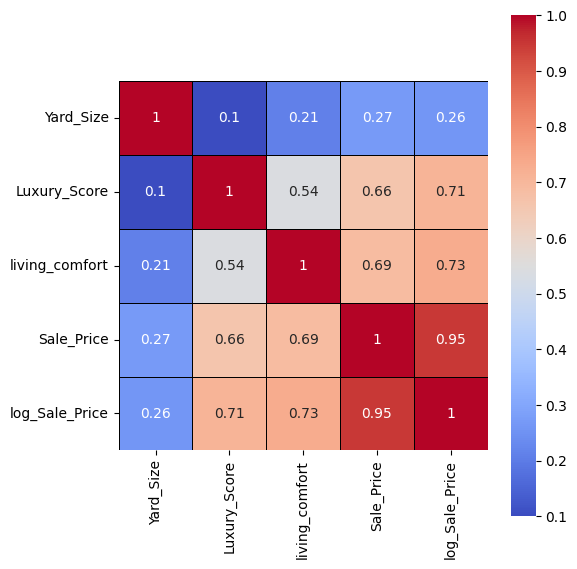

In [28]:
# instantiating a correlation matrix
housing_corr = housing_df.loc[:, ['Yard_Size', 'Luxury_Score', 'living_comfort',\
                                  'Sale_Price', 'log_Sale_Price']].corr().round(2)

# setting figure size
fig, ax = plt.subplots(figsize=(6,6))

# visualizing the correlation matrix
sns.heatmap(housing_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

## Step 4: Explain the results

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
<strong>a)</strong> Did each engineered feature perform as expected? Why or why not? (minimum of 2 sentences per engineered feature)
<br><br>
<strong>b)</strong> What practical idea(s) do you have to help each engineered feature have a stronger linear relationship with either of the response variables? Do not write about collecting more data or performing transformations. (minimum of 3 sentences per engineered feature)

__a)__ <br>
__Yard Size:__ <br>
A strong positive correlation between yard size and the sales price was expected. However, there is a weak positive correlation, where sales price increases disproportionally to the yard size. Most properties have a yard size between 4500 and 15000 sqft. In this range, it does seem to have a small impact on the sales price based as seen in the scatterplot, but only up until this threshold. A yard that is too big is not necessarily attractive to buyers. That might be because a big yard also means lots of efforts for maintenance. <br>

__Luxury Score:__ <br>
For this feature, a strong positive correlation was expected. Based on the analysis, there is a strong positive correlation between luxury score and sales price. It shows that the features quality and conditions is very important for buyers and that fireplace and garage also make the house more attractive. <br>

__Living Comfort:__ <br>
A weak positive correlation was expected because those amenities add value, but were not a priority for potential buyers. However, based on the analysis, a strong positive correlation between living comfort and sales price was discovered. An increased living comfort, though, is a big priority for buyers in Ames, Iowa, since there are cold winters and hot summers. They are attractive enough for the buyers to be willing to pay more. <br>
<br>

__b)__ <br>
__Yard Size:__ <br>
One option can be to remove the porch as it could be considered outdoor and with that yard area. This would increase the lot size which, in its unchanged form, has a strong positive correlation with the price. A second option would be to test the proportion of the yard size compared to the house and see if the percentage proportion has a bigger impact than the total size.  <br>

__Luxury Score:__ <br>
For this feature, it can be sensible to add or remove certain features to increase the correlation. For example, Mas_Vnr_Area could be viewed as more aesthetic and luxurious since it makes the house look nicer. On the other hand, Cars_Garage could be removed, because in Ames, Iowa, almost every house has a garage and therefore, this feature does not add much value in terms of differentiation from other houses.  <br>

__Living Comfort:__ <br>
'Cars_Garage' could be changed to 'has_garage' since the fact of having a garage potentially adds more subjective marginal comfort than having a second car in an already existing garage marginally does. Same is true for the feature 'Fireplaces'. Conversely, 'has_porch' could be changed to 'Proch_Area' to test the impact for the same reasons.   <br>

__AI used for this assignment:__ <br>
<br>
__OpenAI. (2025a). ChatGPT.__<br>
Prompt: does using the logarithm only make sense for areas, or also for categorical values like "quality" or "condition" that are expressed in number scores? <br>
Answer: Does Logarithm Work for Categorical Scores Like Overall_Qual and Overall_Cond?
Using a log transformation is typically beneficial for continuous variables (especially areas and prices) but not categorical values, even if they are expressed numerically (e.g., quality scores).<br>
<br>
__OpenAI. (2025b). ChatGPT.__ <br>
Prompt: Does using the logarithm make sense for continuous variables, but that are rationally speaking still limited, e.g. cars in garage, fireplaces, or number of bathrooms? <br>
Answer: Does Using a Logarithm Make Sense for Limited Continuous Variables?
For continuous but bounded variables like Garage_Cars, Fireplaces, and Total_Baths, applying a logarithm generally does not make sense.